# 机器学习：第二章 数据预处理与特征工程
## 1.数据理解

In [1]:
# 载入库，做基本的设置
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
# 警告库

warnings.filterwarnings('ignore')
# 忽略警告信息

plt.rcParams['font.sans-serif'] = ['SimHei']   # 在图形中能正常显示中文
plt.rcParams['axes.unicode_minus'] = False     # 在图形中能正常显示负号

seaborn色彩选取工具

In [2]:
# 读取 csv 数据，并保存为名称为 titanic_df 的对象 
titanic_df =pd.read_csv('data/train.csv')
# 查看前 5 行 
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


数据集总共有 12 个变量，每一个变量的名称和含义如下

    PassengerId：乘客 ID
    Survived：是否生存
    Pclass：客舱等级
    Name：乘客姓名
    Sex：性别
    Age：年龄
    SibSp：在船兄弟姐妹数/配偶数
    Parch：在船父母数/子女数
    Ticket：船票编号
    Fare：船票价格
    Cabin：客舱号
    Embarked：登船港口

In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_df.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [5]:
(titanic_df.isnull().sum()/len(titanic_df)).sort_values(ascending = False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

In [6]:
titanic_df.isnull().mean().sort_values(ascending=False)
# 每个字段的缺失比例

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

删除无效数据列

In [7]:
# 直接在 titanic_df 中删掉指定的列：PassengerId,Name,Ticket
titanic_df =titanic_df.drop(['PassengerId','Name','Ticket'], axis = 1)
# 查看删除指定列之后的数据前 5 行 
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


## 2.数据探索 - 单变量探索分析
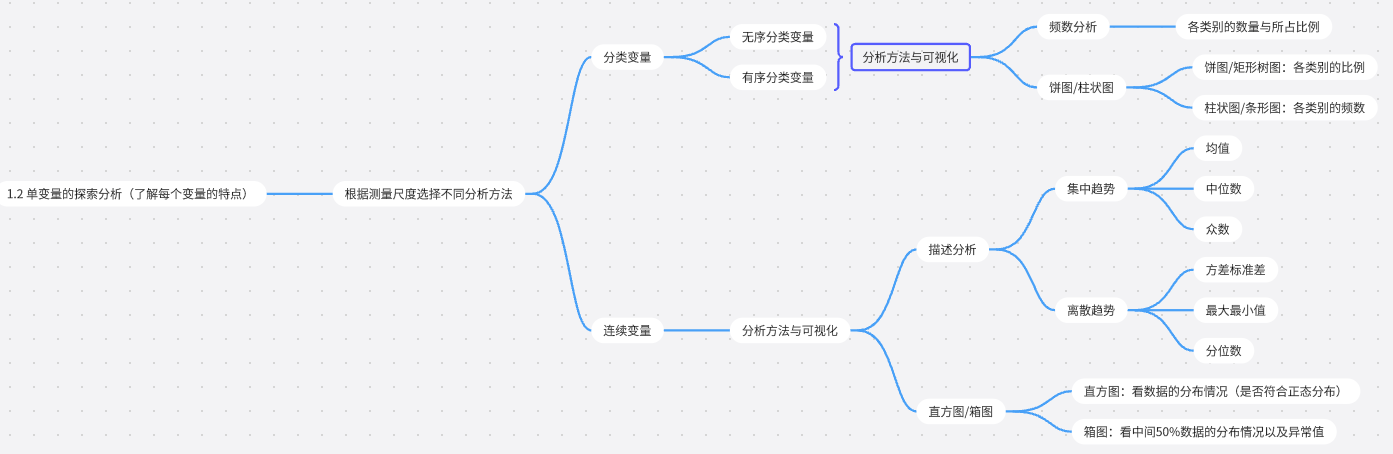

### 2.1 单变量探索分析 - 分类变量

In [8]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [9]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [10]:
titanic_df.describe(include='all')
# pandas是按照数据类型进行测量尺度的区分

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,204,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,147,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,B96 B98,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,4,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN


In [11]:
# 构建Survived和Pclass的分类变量
titanic_df['Survived_c'] = titanic_df.Survived.astype('str')
titanic_df['Pclass_c'] = titanic_df.Pclass.astype('str')

In [12]:
titanic_df.describe(include = 'all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived_c,Pclass_c
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,204,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,147,3,2,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,B96 B98,S,0,3
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,4,644,549,491
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN


#### 2.1.1 Survived（是否生还）频数分析

In [13]:
# 统计频数
Survived_freq = titanic_df.Survived.value_counts()
print(Survived_freq)

Survived
0    549
1    342
Name: count, dtype: int64


In [14]:
titanic_df.Survived.value_counts(normalize = True)
# 标准化：观察每个类别的占比

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

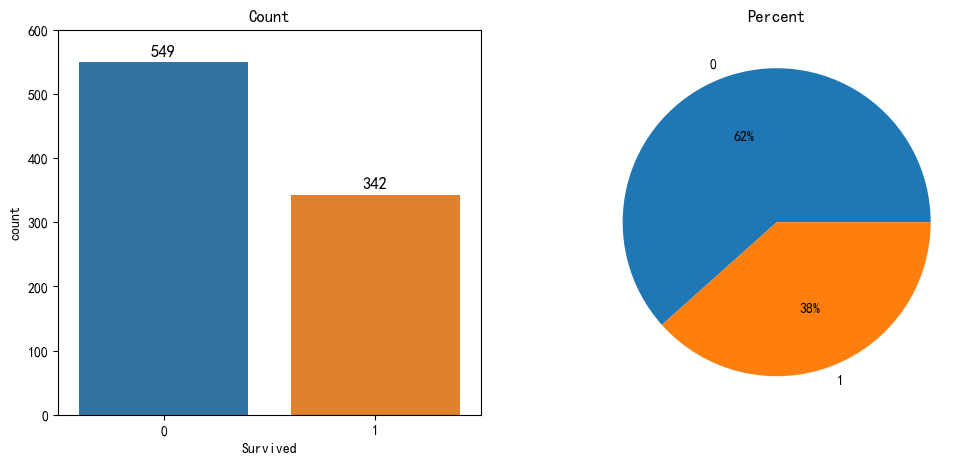

In [15]:
# 生成条图和饼图
%matplotlib inline
plt.figure(figsize = (12,5))
plt.subplot(121)
sns.countplot(
    x='Survived', 
    data=titanic_df
)
for i in range(len(Survived_freq)):
    # 遍历Series的位置索引
    plt.text(
        i,
        Survived_freq[i] + 10,
        Survived_freq[i],
        ha = 'center',
        fontsize = 12
    )
plt.ylim(0, 600)
plt.title('Count')

plt.subplot(122)
plt.pie(
    Survived_freq,
    labels=Survived_freq.index,
    autopct='%1.0f%%'
)
plt.title('Percent')
plt.show()

#### 2.1.2 Pclass（船舱等级）频数分析

In [16]:
# 统计频数
Pclass_freq = titanic_df.Pclass.value_counts().sort_index()
print(Pclass_freq)

Pclass
1    216
2    184
3    491
Name: count, dtype: int64


In [17]:
titanic_df.Pclass.value_counts(normalize=True).sort_index()

Pclass
1    0.242424
2    0.206510
3    0.551066
Name: proportion, dtype: float64

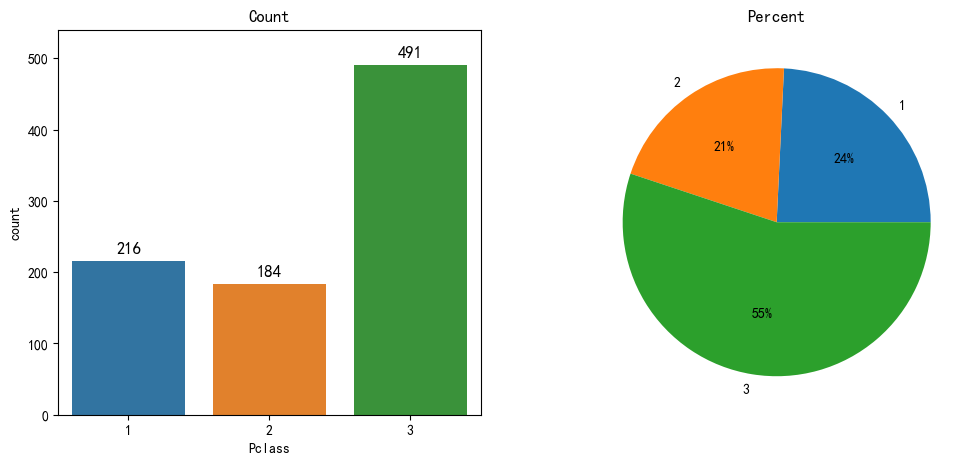

In [18]:
# 生成条图和饼图
plt.figure(figsize = (12,5))
plt.subplot(121)
sns.countplot(
    x='Pclass', 
    data=titanic_df
)
for i in range(len(Pclass_freq)):
    plt.text(
        i,
        Pclass_freq[i+1] + 10,  
        # 因为Series的标签索引也是数字，而且是从1开始的的，因此这里i + 1
        Pclass_freq[i+1],
        ha = 'center',
        fontsize = 12
    )
plt.title('Count')
plt.ylim(0, 540)
plt.subplot(122)
plt.pie(Pclass_freq,labels=Pclass_freq.index,autopct='%1.0f%%')
plt.title('Percent')
plt.show()

In [19]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived_c,Pclass_c
0,0,3,male,22.0,1,0,7.2500,NaN,S,0,3
1,1,1,female,38.0,1,0,71.2833,C85,C,1,1
2,1,3,female,26.0,0,0,7.9250,NaN,S,1,3
3,1,1,female,35.0,1,0,53.1000,C123,S,1,1
4,0,3,male,35.0,0,0,8.0500,NaN,S,0,3


将分类变量的分析和可视化处理包装成函数

In [20]:
def cate_analysis(df = titanic_df, feature = None):
    """
    函数功能：
        针对分类变量进行频数分析/百分比分析，并用柱状图和饼图进行可视化观察
    函数参数：
        df : 用来进行分析的数据集，默认是titanic_df
        feature : 用来进行分析的分类变量
    函数返回值：
        None
    """
    cate_freq = df[feature].value_counts()  # 频数分析
    print('频数分布情况:')
    print(cate_freq)
    print('各类别占比情况:')
    print(df[feature].value_counts(normalize = True) )  # 百分比
    
    # 生成条图和饼图
    plt.figure(figsize = (12,5))
    plt.subplot(121)
    sns.countplot(
        x = feature, 
        data = df
    )
    for i in range(len(cate_freq)):
        plt.text(
            i,
            cate_freq[i] + cate_freq.max() / 25,  
            cate_freq[i],
            ha = 'center',
            fontsize = 12
        )
    plt.title('Count')
    plt.ylim(0, cate_freq.max() * 1.12)
    plt.subplot(122)
    plt.pie(
        cate_freq,
        labels = cate_freq.index,
        autopct = '%1.0f%%')
    plt.title('Percent')
    plt.show()

频数分布情况:
Survived
0    549
1    342
Name: count, dtype: int64
各类别占比情况:
Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


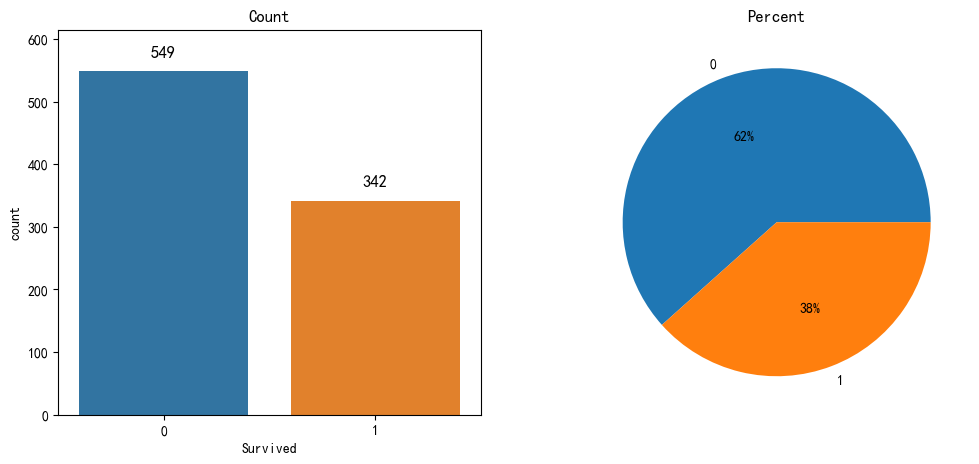

In [21]:
cate_analysis(feature='Survived')

In [22]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived_c,Pclass_c
0,0,3,male,22.0,1,0,7.2500,NaN,S,0,3
1,1,1,female,38.0,1,0,71.2833,C85,C,1,1
2,1,3,female,26.0,0,0,7.9250,NaN,S,1,3
3,1,1,female,35.0,1,0,53.1000,C123,S,1,1
4,0,3,male,35.0,0,0,8.0500,NaN,S,0,3


频数分布情况:
Sex
male      577
female    314
Name: count, dtype: int64
各类别占比情况:
Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64


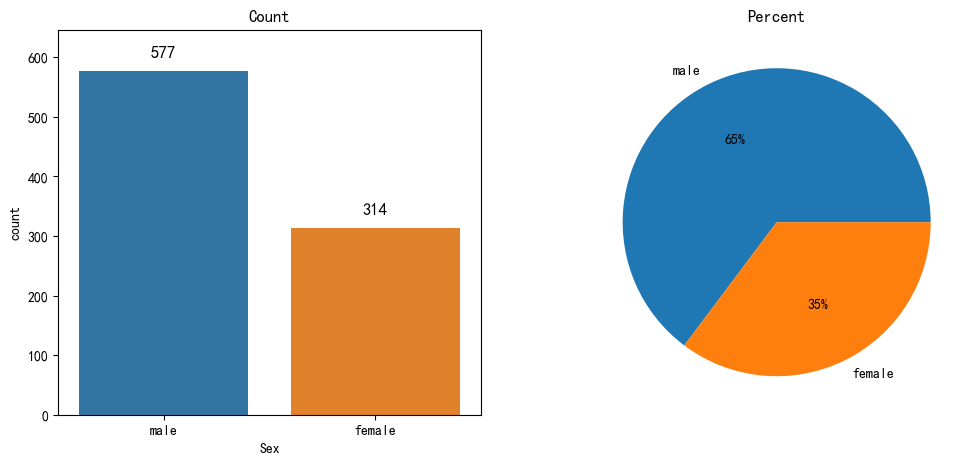

In [23]:
cate_analysis(feature = 'Sex')

频数分布情况:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
各类别占比情况:
Embarked
S    0.724409
C    0.188976
Q    0.086614
Name: proportion, dtype: float64


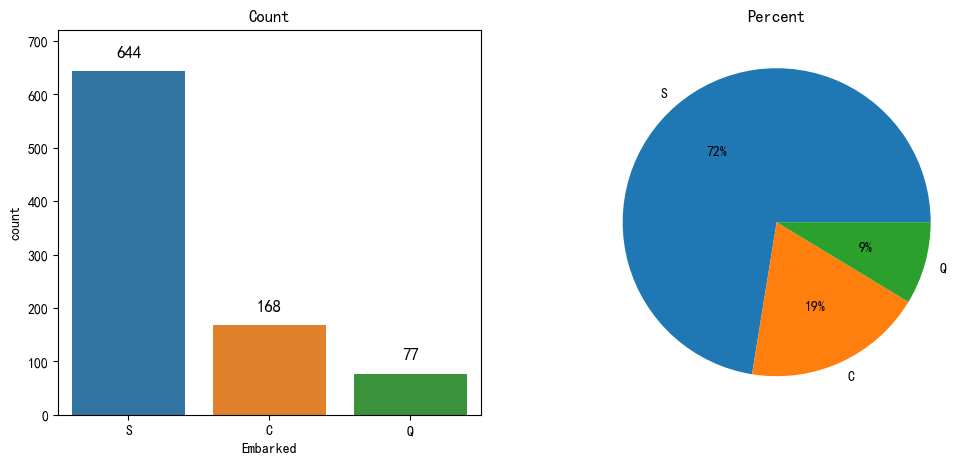

In [24]:
cate_analysis(feature = 'Embarked')

### 2.2 单变量探索分析 - 连续变量

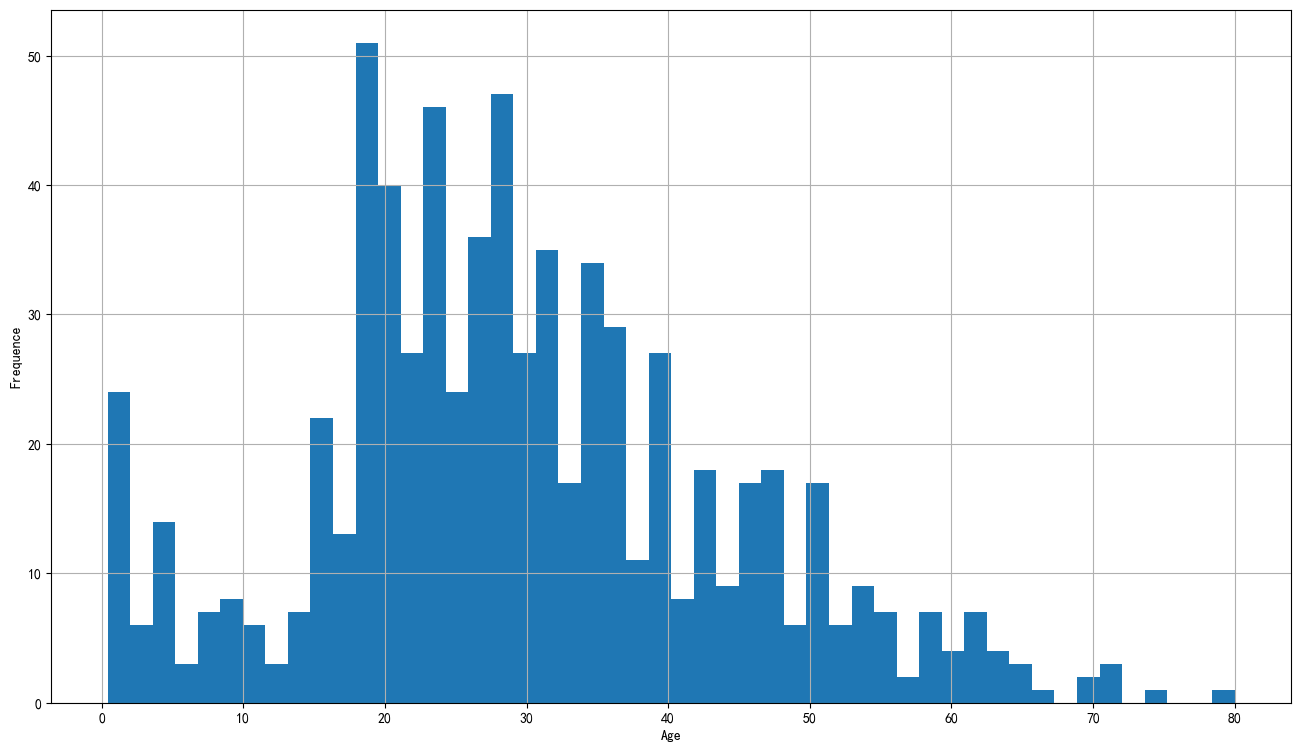

In [25]:
# Age（年龄）直方图分布
plt.figure(figsize=(16,9))
titanic_df['Age'].hist(bins = 50)
#使用 hist()方法，把 Age 划分为 50 个区间绘图
plt.xlabel('Age')
plt.ylabel('Frequence')
plt.show()

In [26]:
import scipy

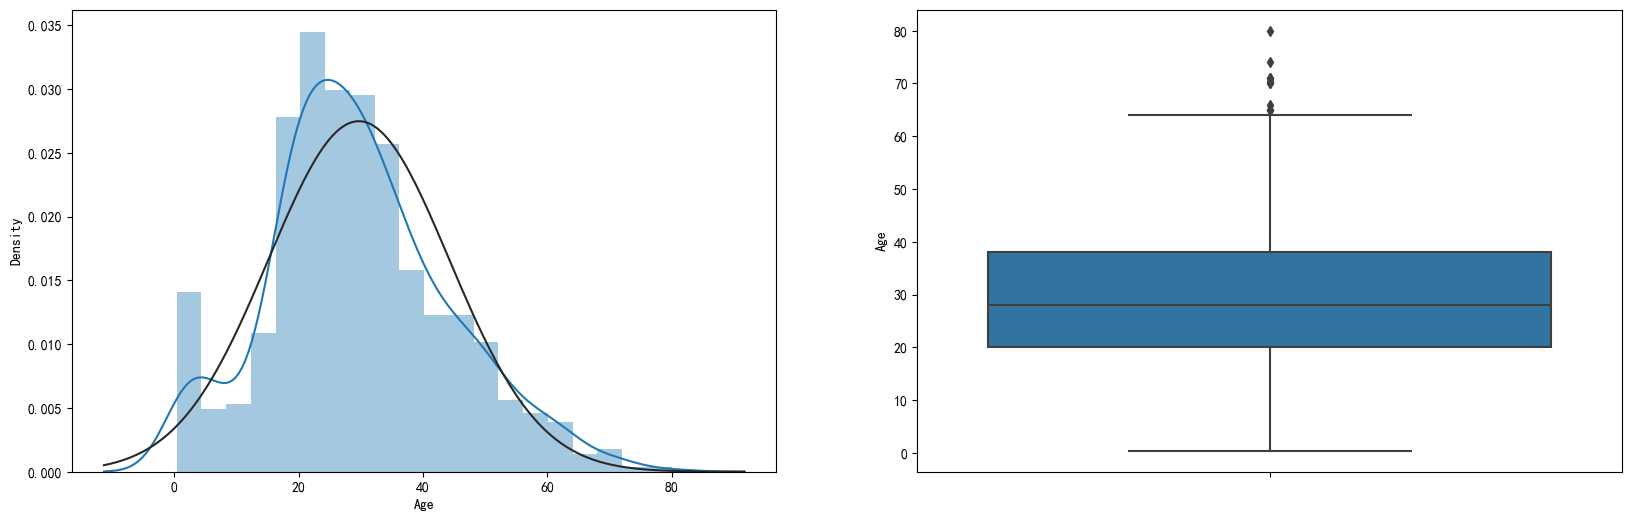

In [27]:
# 用直方图和箱图同时进行观察
plt.figure(figsize = (20, 6))

# 直方图
plt.subplot(1, 2, 1)
sns.distplot(
    titanic_df.Age,
    fit = scipy.stats.norm
)

# 箱图
plt.subplot(1, 2, 2)
sns.boxplot(
    y = titanic_df.Age
)

plt.show()

In [28]:
titanic_df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [29]:
titanic_df[['Age']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0


In [30]:
titanic_df[['Age']].quantile(np.arange(0.1, 1.1, 0.1)).T

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
Age,14.0,19.0,22.0,25.0,28.0,31.8,36.0,41.0,50.0,80.0


In [31]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         714 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Cabin       204 non-null    object 
 8   Embarked    889 non-null    object 
 9   Survived_c  891 non-null    object 
 10  Pclass_c    891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [32]:
# 用函数实现连续变量的描述性统计分析和可视化观察
def cont_analysis(df = titanic_df, feature = None):
    """
    函数功能：
        针对连续变量，通过描述分析和分位数分析观察其基本情况，
        通过直方图和箱图观察数据的分布与异常值情况
    函数参数：
        df : 进行分析的数据集，默认是titanic_df
        feature : 进行分析的连续变量
    函数返回值：
        None
    """
    # 描述分析与分位数分析
    print('描述分析：')
    display(df[[feature]].describe().T)
    # display是在jupyter notebook中按照DataFrame的格式进行输出
    print('分位数分析：')
    display(df[[feature]].quantile(np.arange(0.1, 1.1, 0.1)).T)
    
    # 可视化：直方图和箱图
    plt.figure(figsize = (16, 6))

    # 直方图
    plt.subplot(1, 2, 1)
    sns.distplot(
        df[feature],
        fit = scipy.stats.norm
    )
    plt.title('直方图')

    # 箱图
    plt.subplot(1, 2, 2)
    sns.boxplot(
        y = df[feature]
    )
    plt.title('箱图')

    plt.show()

描述分析：


,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0


分位数分析：


,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
Age,14.0,19.0,22.0,25.0,28.0,31.8,36.0,41.0,50.0,80.0


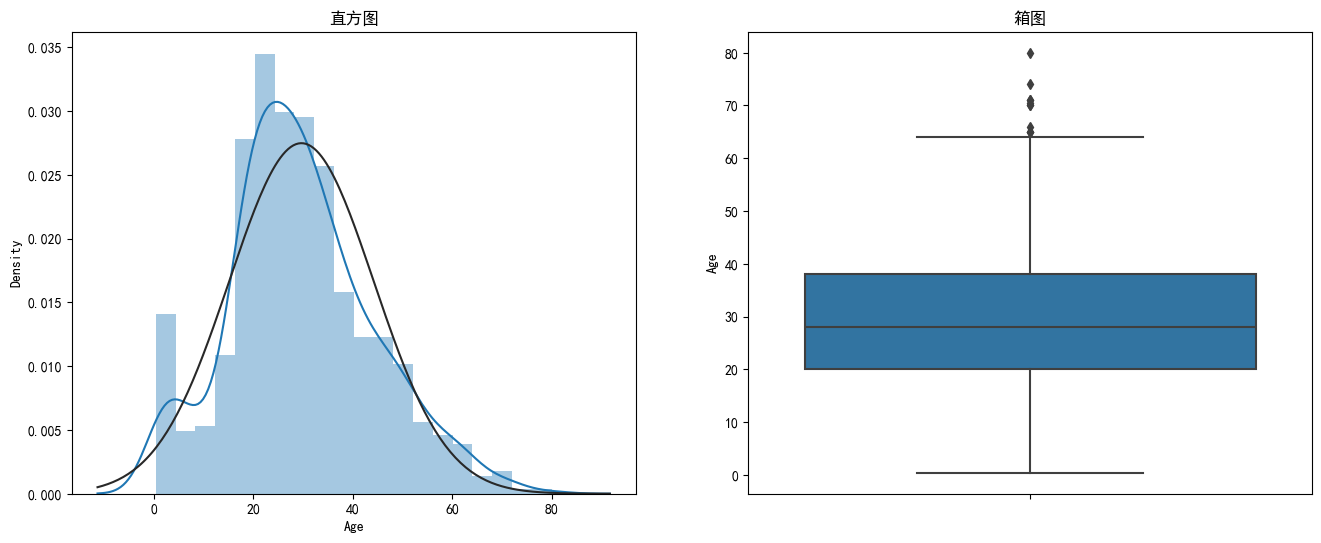

In [33]:
cont_analysis(feature = 'Age')

In [34]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived_c,Pclass_c
0,0,3,male,22.0,1,0,7.2500,NaN,S,0,3
1,1,1,female,38.0,1,0,71.2833,C85,C,1,1
2,1,3,female,26.0,0,0,7.9250,NaN,S,1,3
3,1,1,female,35.0,1,0,53.1000,C123,S,1,1
4,0,3,male,35.0,0,0,8.0500,NaN,S,0,3


In [35]:
titanic_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked', 'Survived_c', 'Pclass_c'],
      dtype='object')

In [36]:
titanic_df.columns[3:7]

Index(['Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

关于Age的观察
描述分析：


,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0


分位数分析：


,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
Age,14.0,19.0,22.0,25.0,28.0,31.8,36.0,41.0,50.0,80.0


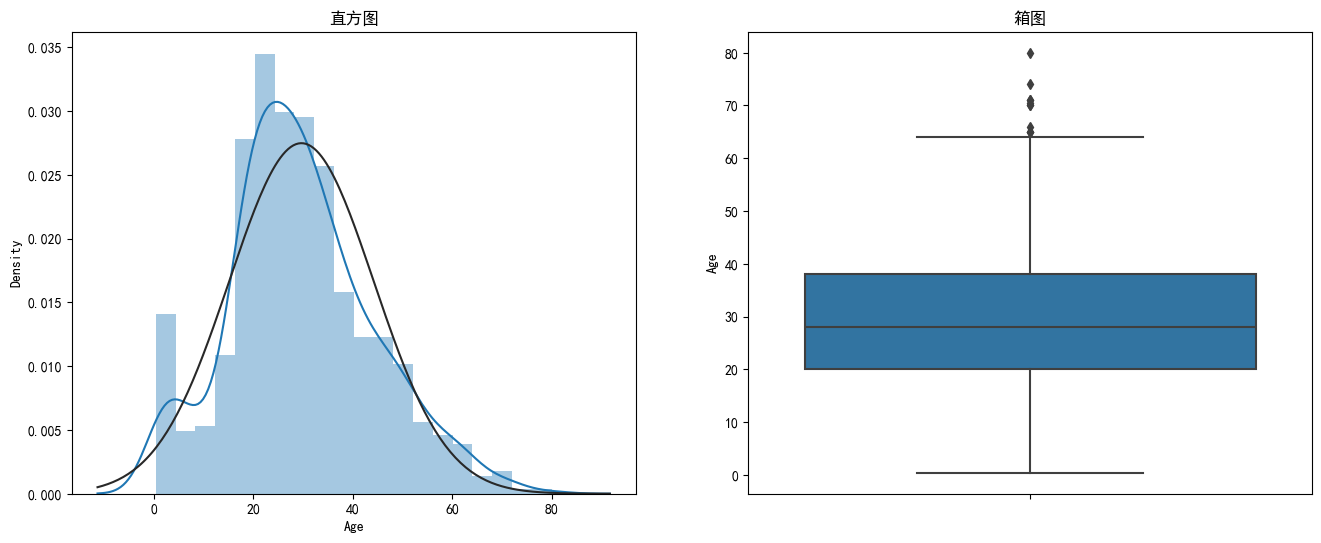

----------------------------------------------------------------------------------------------------
关于SibSp的观察
描述分析：


,count,mean,std,min,25%,50%,75%,max
SibSp,891.0,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0


分位数分析：


,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
SibSp,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,8.0


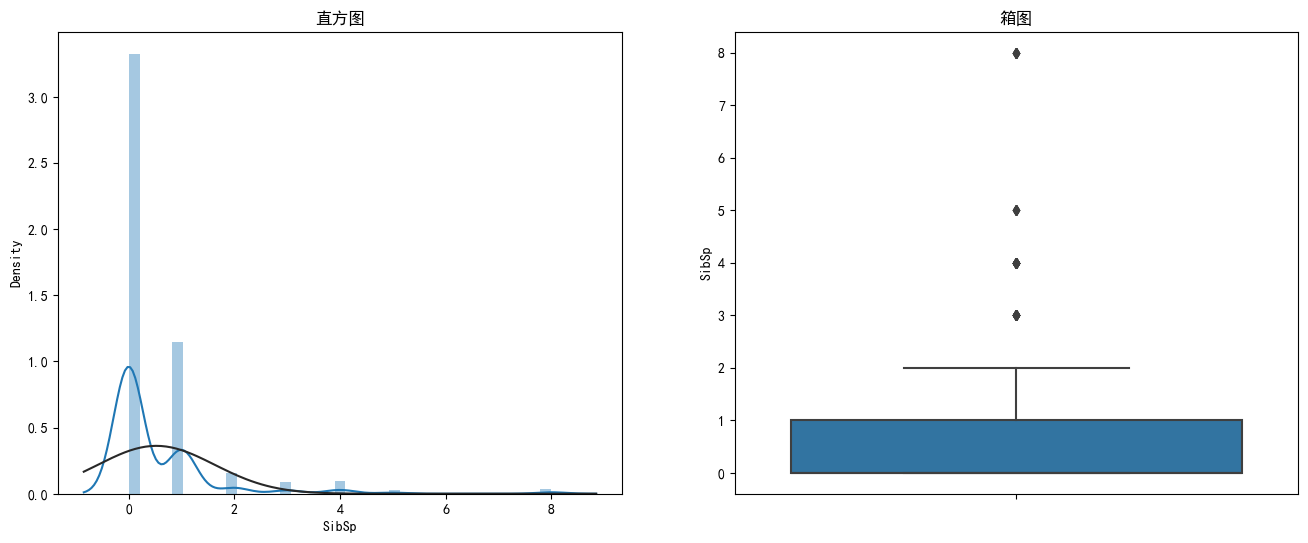

----------------------------------------------------------------------------------------------------
关于Parch的观察
描述分析：


,count,mean,std,min,25%,50%,75%,max
Parch,891.0,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0


分位数分析：


,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
Parch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,6.0


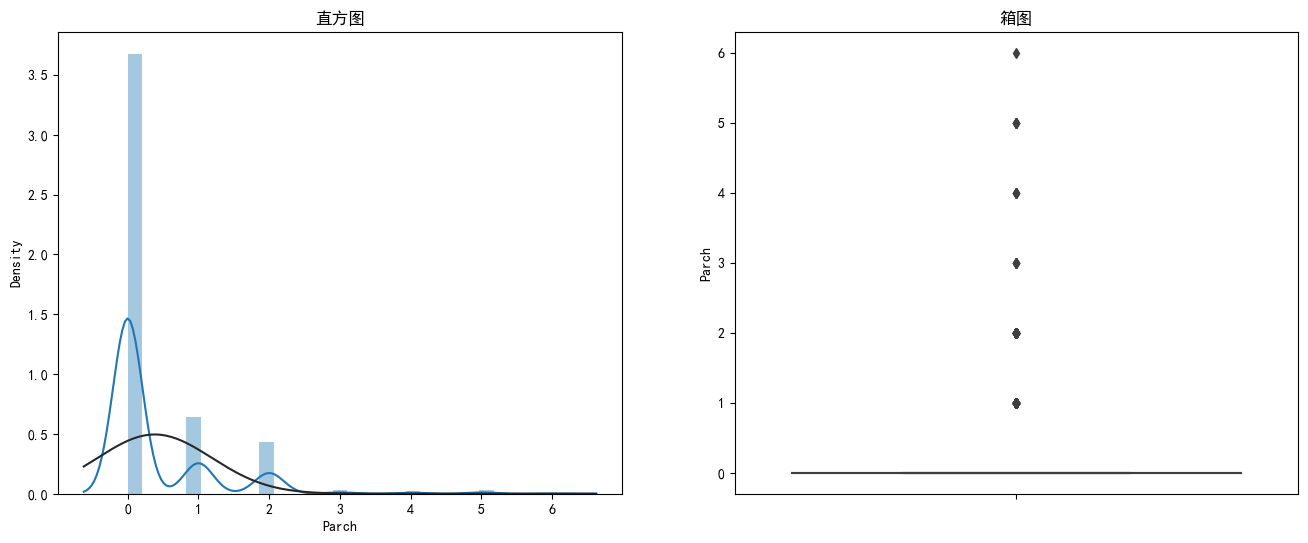

----------------------------------------------------------------------------------------------------
关于Fare的观察
描述分析：


,count,mean,std,min,25%,50%,75%,max
Fare,891.0,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


分位数分析：


,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
Fare,7.55,7.8542,8.05,10.5,14.4542,21.6792,27.0,39.6875,77.9583,512.3292


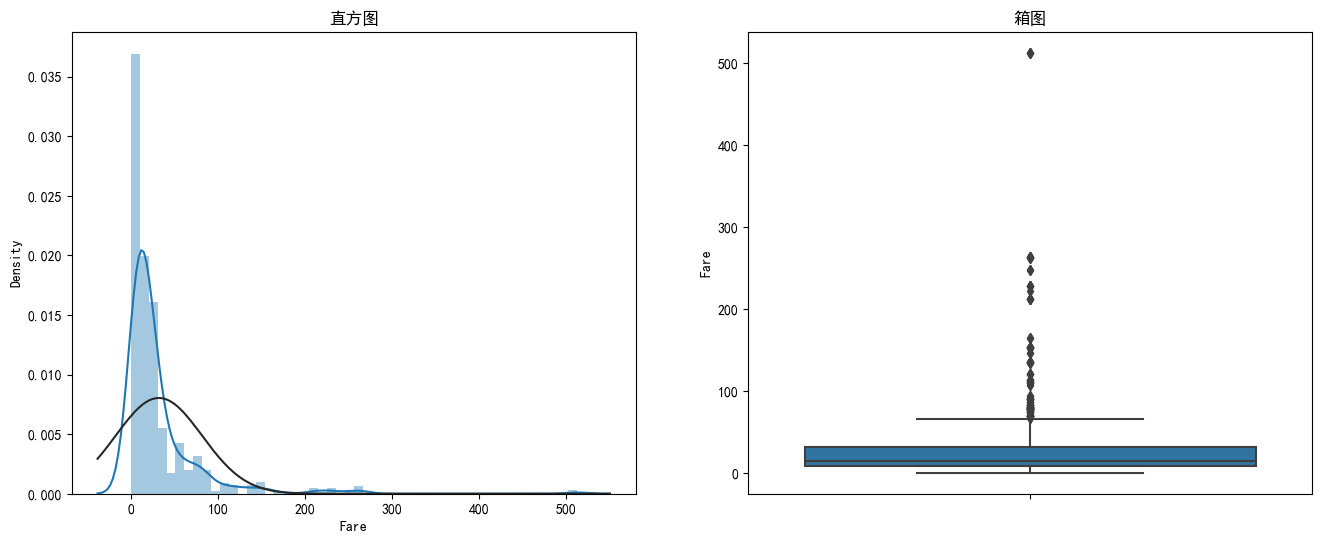

----------------------------------------------------------------------------------------------------


In [37]:
for i in titanic_df.columns[3:7]:
    # print(i)
    print(f'关于{i}的观察')
    cont_analysis(feature = i)
    print('-'*100)

## 3.数据探索 - 多变量探索分析
### 3.1 连续对连续

In [38]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived_c,Pclass_c
0,0,3,male,22.0,1,0,7.2500,NaN,S,0,3
1,1,1,female,38.0,1,0,71.2833,C85,C,1,1
2,1,3,female,26.0,0,0,7.9250,NaN,S,1,3
3,1,1,female,35.0,1,0,53.1000,C123,S,1,1
4,0,3,male,35.0,0,0,8.0500,NaN,S,0,3


观察Age和Fare的关系

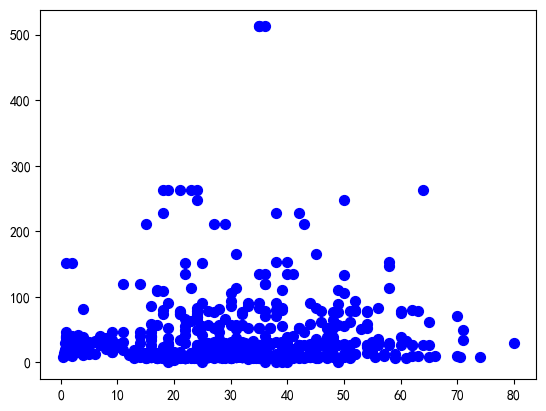

In [39]:
plt.scatter(titanic_df.Age,titanic_df.Fare,50,"blue")
plt.show()

通过皮尔逊相关系数对两个连续变量之间的相关性强弱进行衡量

    pd.Series.corr(self, other, method='pearson', min_periods=None) -> 'float'
    other : 和当前的Series求相关系数的另一个Series
    返回两个Series之间的相关系数

In [40]:
titanic_df.Age.corr(titanic_df.Fare)

0.09606669176903894

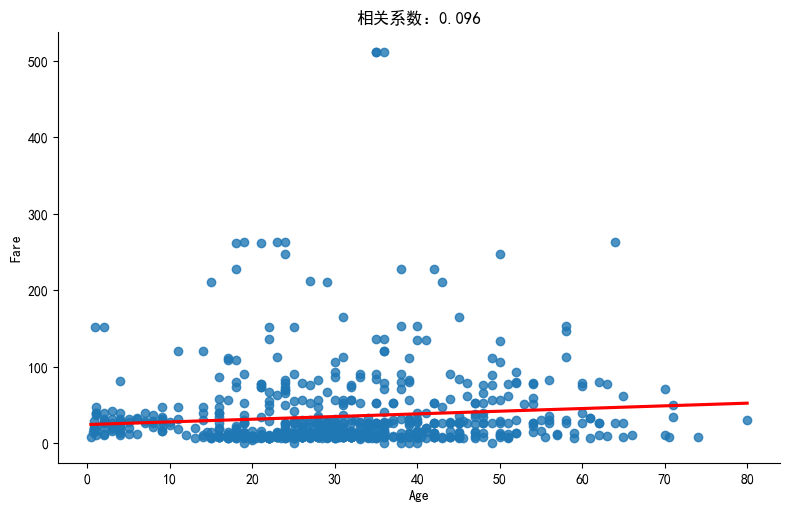

In [41]:
# 用回归图进行观察
sns.lmplot(
    x = 'Age',
    y = 'Fare',
    data = titanic_df,
    aspect = 1.6,
    ci = 0,
    line_kws = {'color':'red'}
)
plt.title('相关系数：' + str(round(titanic_df.Age.corr(titanic_df.Fare),3)))
plt.show()

### 3.2 分类对分类

In [42]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived_c,Pclass_c
0,0,3,male,22.0,1,0,7.2500,NaN,S,0,3
1,1,1,female,38.0,1,0,71.2833,C85,C,1,1
2,1,3,female,26.0,0,0,7.9250,NaN,S,1,3
3,1,1,female,35.0,1,0,53.1000,C123,S,1,1
4,0,3,male,35.0,0,0,8.0500,NaN,S,0,3


In [43]:
# Survived VS Pclass 交叉表，单元格内显示频数
pd.crosstab(titanic_df.Survived,titanic_df.Pclass,margins=True)

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


In [44]:
# Survived VS Pclass 交叉表，单元格内显示列百分比（每一列的百分比加总=100%）
pd.crosstab(titanic_df.Survived,titanic_df.Pclass).apply(lambda r: r/r.sum(), axis=0)

Pclass,1,2,3
Survived,,,
0,0.37037,0.527174,0.757637
1,0.62963,0.472826,0.242363


In [45]:
pd.crosstab(
    titanic_df.Survived,
    titanic_df.Pclass,
    normalize = 'columns'
)

Pclass,1,2,3
Survived,,,
0,0.37037,0.527174,0.757637
1,0.62963,0.472826,0.242363


Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


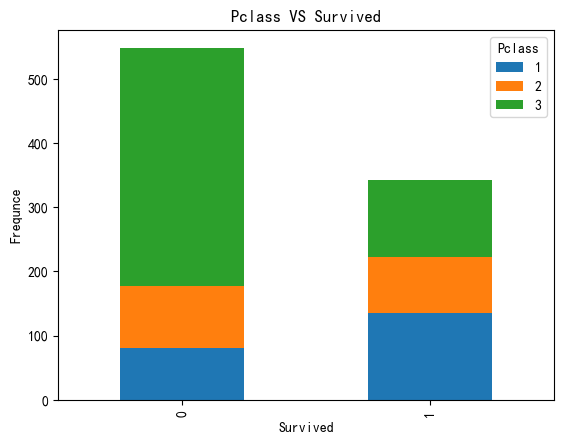

In [46]:
# 使用 crosstab 先生成作图所需的数据，注意去掉了 margins=True,作图的时候不需要显示行列汇总的频数
data = pd.crosstab(titanic_df.Survived,titanic_df.Pclass)
print(data)
# 绘制堆栈条图
data.plot(kind='bar', stacked=True)
plt.title("Pclass VS Survived")
plt.ylabel('Frequnce')
plt.show()

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


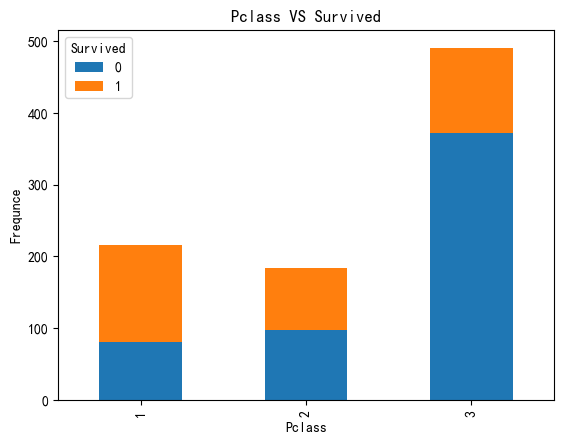

In [47]:
# 使用 crosstab 先生成作图所需的数据，注意去掉了 margins=True,作图的时候不需要显示行列汇总的频数
data = pd.crosstab(titanic_df.Pclass,titanic_df.Survived)
print(data)
# 绘制堆栈条图
data.plot(kind='bar', stacked=True)
plt.title("Pclass VS Survived")
plt.ylabel('Frequnce')
plt.show()
# 堆叠柱状图

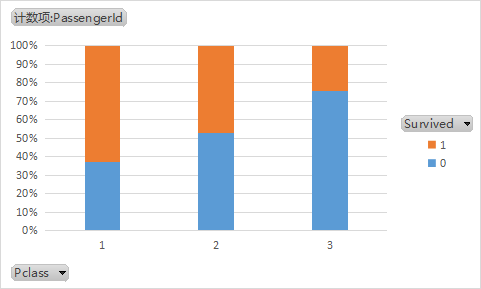

Survived         0         1
Pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363


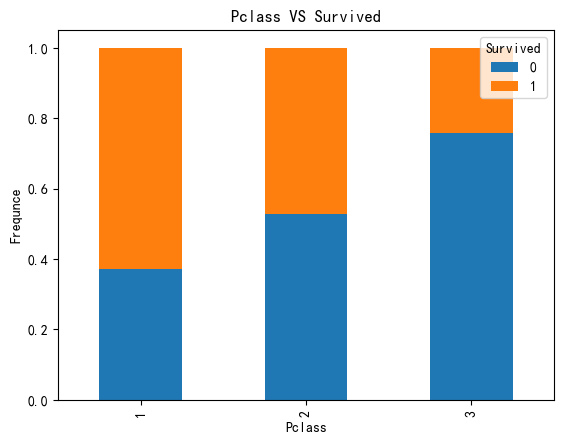

In [48]:
# 使用 crosstab 先生成作图所需的数据，注意去掉了 margins=True,作图的时候不需要显示行列汇总的频数
data = pd.crosstab(
    titanic_df.Pclass,
    titanic_df.Survived,
    normalize = 'index'
)
print(data)
# 绘制堆栈条图
data.plot(kind='bar', stacked=True)
plt.title("Pclass VS Survived")
plt.ylabel('Frequnce')
plt.show()
# 百分比堆叠柱状图

思考题：用函数实现分类对分类的交叉表、百分比观察和百分比堆叠柱状图的实现，在百分比堆叠柱状图中添加对应的数据标签

### 3.3 连续对分类

In [49]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived_c,Pclass_c
0,0,3,male,22.0,1,0,7.2500,NaN,S,0,3
1,1,1,female,38.0,1,0,71.2833,C85,C,1,1
2,1,3,female,26.0,0,0,7.9250,NaN,S,1,3
3,1,1,female,35.0,1,0,53.1000,C123,S,1,1
4,0,3,male,35.0,0,0,8.0500,NaN,S,0,3
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S,0,2
887,1,1,female,19.0,0,0,30.0000,B42,S,1,1
888,0,3,female,NaN,1,2,23.4500,NaN,S,0,3
889,1,1,male,26.0,0,0,30.0000,C148,C,1,1


In [50]:
# 按 Survived 汇总，求 Age 和 Fare 的均值
titanic_df.groupby('Survived').agg({'Age':'mean','Fare':'mean'})

,Age,Fare
Survived,,
0,30.626179,22.117887
1,28.343690,48.395408


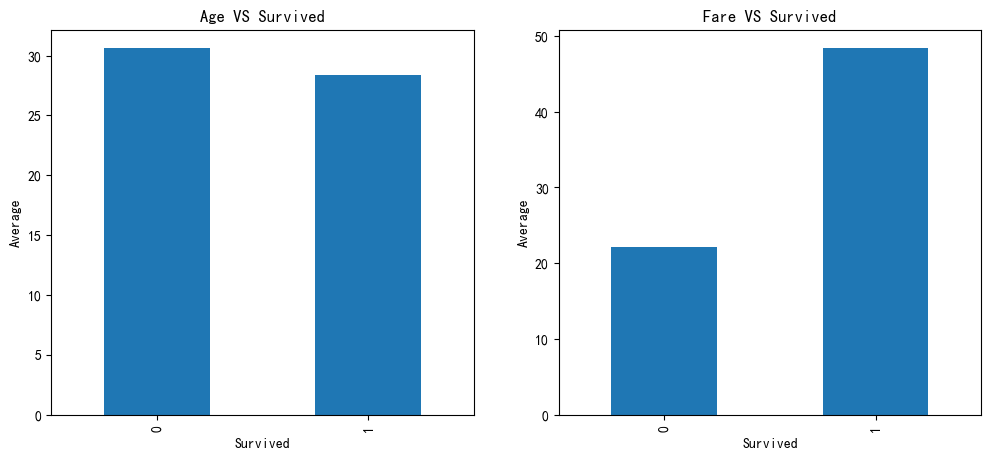

In [51]:
data = titanic_df.groupby('Survived').agg({'Age':'mean','Fare':'mean'})
plt.figure(figsize = (12,5))
plt.subplot(121)
data.Age.plot(kind='bar')
plt.title("Age VS Survived")
plt.ylabel('Average')
plt.subplot(122)
data.Fare.plot(kind='bar')
plt.title("Fare VS Survived")
plt.ylabel('Average')
plt.show()

<Axes: xlabel='Survived', ylabel='Age'>

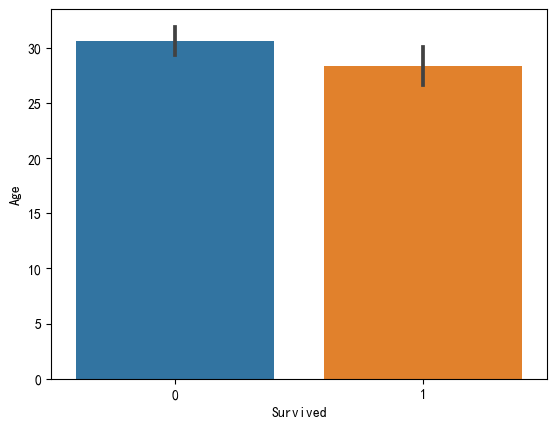

In [52]:
sns.barplot(
    x = 'Survived',
    y = 'Age',
    data = titanic_df
)

<Axes: xlabel='Survived', ylabel='Age'>

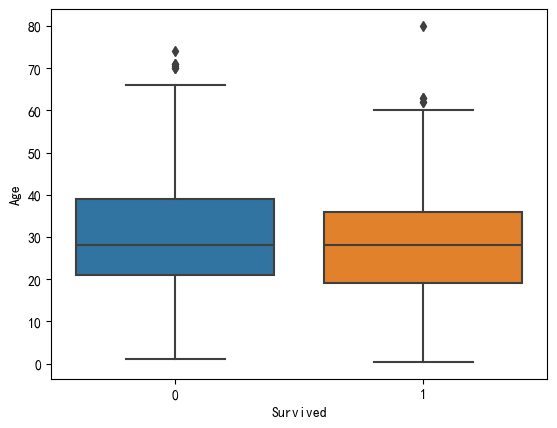

In [53]:
sns.boxplot(
    x = 'Survived',
    y = 'Age',
    data = titanic_df
)

(0.0, 300.0)

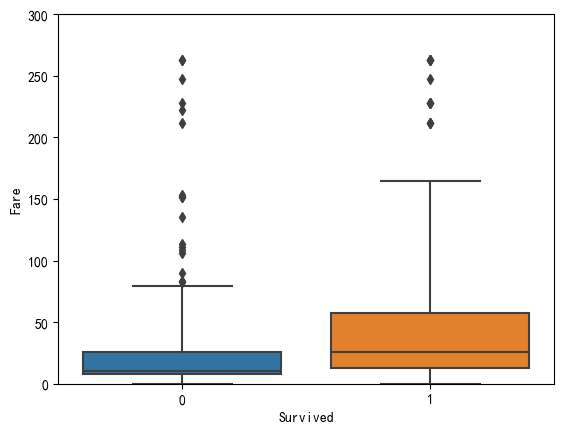

In [54]:
sns.boxplot(
    x = 'Survived',
    y = 'Fare',
    data = titanic_df,
    whis = 3  # 只显示极端异常值（超过上下四分位数3倍四分位距的数据）
)
plt.ylim(0,300)

(0.0, 300.0)

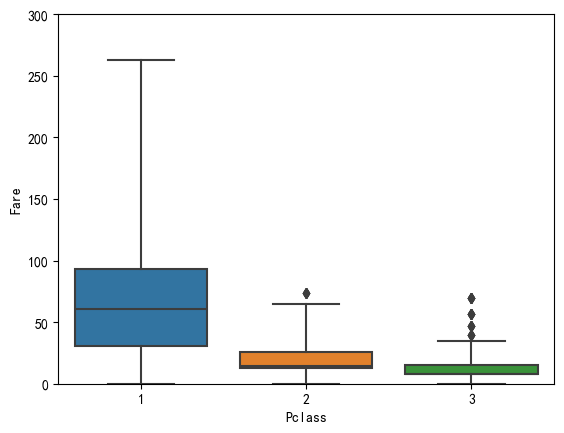

In [55]:
sns.boxplot(
    x = 'Pclass',
    y = 'Fare',
    data = titanic_df,
    whis = 3  # 只显示极端异常值（超过上下四分位数3倍四分位距的数据）
)
plt.ylim(0,300)

## 4.数据预处理
### 4.1 缺失值处理

    有三种常用缺失值处理方法：

    删除：简单粗暴，直接把有缺失值的整条记录删除。这种方法适合数据样本较大而缺失记录较少的场景，删除缺失记录对整体影响很小。
        删除变量：如果某个变量缺失太多，可以考虑直接删除
    转换：构造一个新变量来标记缺失值：缺失就标记为 1，不缺失就标记为 0。这种方法认为缺失值本身是一个有意义的信息，不能简单处理掉，必须要标记出来
    填充：用一个值替换掉缺失值，具体用什么值来替换这个方法也比较多，例如对数值型变量可以考虑用均值，对类别型变量用频数最大的那个值（众数）

In [56]:
titanic_df.isnull().mean().sort_values(ascending=False)

Cabin         0.771044
Age           0.198653
Embarked      0.002245
Survived      0.000000
Pclass        0.000000
Sex           0.000000
SibSp         0.000000
Parch         0.000000
Fare          0.000000
Survived_c    0.000000
Pclass_c      0.000000
dtype: float64

#### 4.1.1 删除缺失值

In [57]:
# 删除整个数据集中任何一个变量有缺失的记录
dropna = titanic_df.dropna()
dropna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    183 non-null    int64  
 1   Pclass      183 non-null    int64  
 2   Sex         183 non-null    object 
 3   Age         183 non-null    float64
 4   SibSp       183 non-null    int64  
 5   Parch       183 non-null    int64  
 6   Fare        183 non-null    float64
 7   Cabin       183 non-null    object 
 8   Embarked    183 non-null    object 
 9   Survived_c  183 non-null    object 
 10  Pclass_c    183 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 17.2+ KB


In [58]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         714 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Cabin       204 non-null    object 
 8   Embarked    889 non-null    object 
 9   Survived_c  891 non-null    object 
 10  Pclass_c    891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [59]:
# 对 Age 变量删除缺失值，保存为一个新的变量
Age_dropna = titanic_df[['Age']].dropna()
Age_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     714 non-null    float64
dtypes: float64(1)
memory usage: 11.2 KB


In [60]:
# 使用Embarked作为删除的依据
t_df1 = titanic_df.dropna(subset=['Embarked'])
t_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Pclass      889 non-null    int64  
 2   Sex         889 non-null    object 
 3   Age         712 non-null    float64
 4   SibSp       889 non-null    int64  
 5   Parch       889 non-null    int64  
 6   Fare        889 non-null    float64
 7   Cabin       202 non-null    object 
 8   Embarked    889 non-null    object 
 9   Survived_c  889 non-null    object 
 10  Pclass_c    889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.3+ KB


In [61]:
t_df2 = titanic_df.drop('Cabin', axis = 1)

In [62]:
t_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         714 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked    889 non-null    object 
 8   Survived_c  891 non-null    object 
 9   Pclass_c    891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [63]:
t_df2.isnull().mean().sort_values(ascending = False)

Age           0.198653
Embarked      0.002245
Survived      0.000000
Pclass        0.000000
Sex           0.000000
SibSp         0.000000
Parch         0.000000
Fare          0.000000
Survived_c    0.000000
Pclass_c      0.000000
dtype: float64

#### 4.1.2 针对缺失值的转换

In [64]:
# 构造一个新的变量 Age_isna,当 Age 是缺失值的时候 Age_isna=1，否则=0
titanic_df['Age_isna']=0
titanic_df.loc[titanic_df['Age'].isnull(), 'Age_isna'] = 1
# 对 Age_isna 进行频数分析，确认 Age_isna 是否构造正确
titanic_df['Age_isna'].value_counts()

Age_isna
0    714
1    177
Name: count, dtype: int64

In [65]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         714 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Cabin       204 non-null    object 
 8   Embarked    889 non-null    object 
 9   Survived_c  891 non-null    object 
 10  Pclass_c    891 non-null    object 
 11  Age_isna    891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [66]:
# 通过交叉表观察年龄是否缺失对是否生还的影响
data = pd.crosstab(
    index = titanic_df.Age_isna,
    columns = titanic_df.Survived,
    normalize = 'columns'
)
data

Survived,0,1
Age_isna,,
0,0.772313,0.847953
1,0.227687,0.152047


Survived         0         1
Age_isna                    
0         0.593838  0.406162
1         0.706215  0.293785


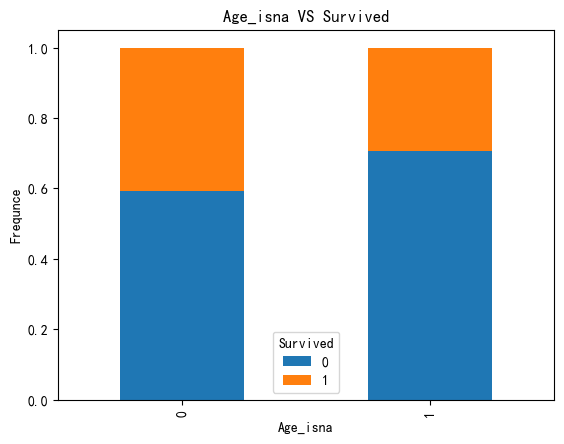

In [67]:
# 使用 crosstab 先生成作图所需的数据，注意去掉了 margins=True,作图的时候不需要显示行列汇总的频数
data = pd.crosstab(
    titanic_df.Age_isna,
    titanic_df.Survived,
    normalize = 'index'
)
print(data)
# 绘制堆栈条图
data.plot(kind='bar', stacked=True)
plt.title("Age_isna VS Survived")
plt.ylabel('Frequnce')
plt.show()
# 百分比堆叠柱状图

In [68]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         714 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Cabin       204 non-null    object 
 8   Embarked    889 non-null    object 
 9   Survived_c  891 non-null    object 
 10  Pclass_c    891 non-null    object 
 11  Age_isna    891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [69]:
# 构造一个新的变量 Cabin_isna,当 Cabin 是缺失值的时候 Cabin_isna=1，否则=0
titanic_df['Cabin_isna']=0
titanic_df.loc[titanic_df['Cabin'].isnull(), 'Cabin_isna'] = 1
# 对 Cabin_isna 进行频数分析，确认 Cabin_isna 是否构造正确
titanic_df['Cabin_isna'].value_counts()

Cabin_isna
1    687
0    204
Name: count, dtype: int64

Survived           0         1
Cabin_isna                    
0           0.333333  0.666667
1           0.700146  0.299854


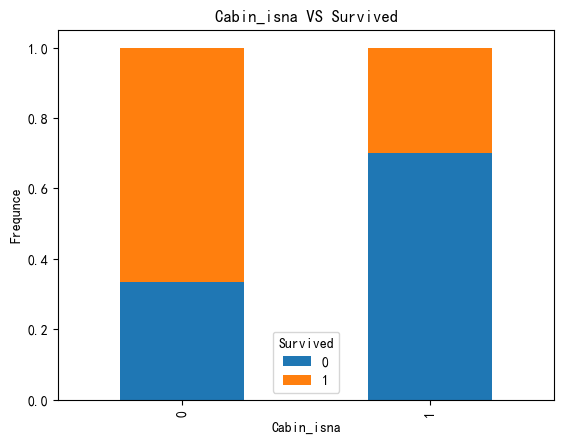

In [70]:
# 使用 crosstab 先生成作图所需的数据，注意去掉了 margins=True,作图的时候不需要显示行列汇总的频数
data = pd.crosstab(
    titanic_df.Cabin_isna,
    titanic_df.Survived,
    normalize = 'index'
)
print(data)
# 绘制堆栈条图
data.plot(kind='bar', stacked=True)
plt.title("Cabin_isna VS Survived")
plt.ylabel('Frequnce')
plt.show()
# 百分比堆叠柱状图

#### 4.1.3 替换缺失值

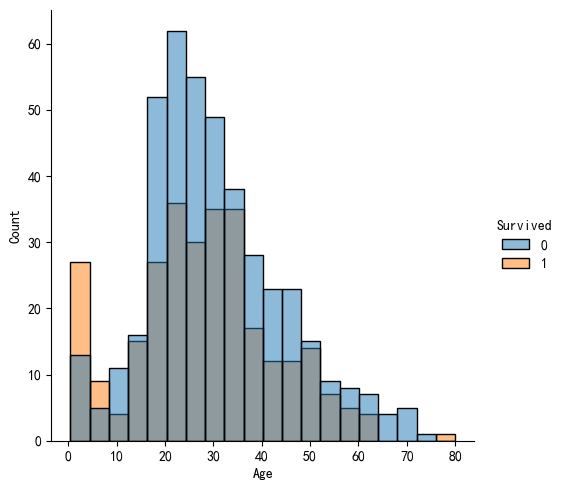

In [71]:
# 通过直方图观察年龄
sns.displot(
    x = 'Age',
    hue = 'Survived',
    data = titanic_df
)

In [72]:
# 对年龄缺失值进行均值填充
age_mean = round(titanic_df['Age'].mean())
titanic_df['Age1'] = titanic_df.Age.fillna(age_mean)
titanic_df.Age1.describe()

count    891.000000
mean      29.758889
std       13.002570
min        0.420000
25%       22.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: Age1, dtype: float64

In [73]:
titanic_df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

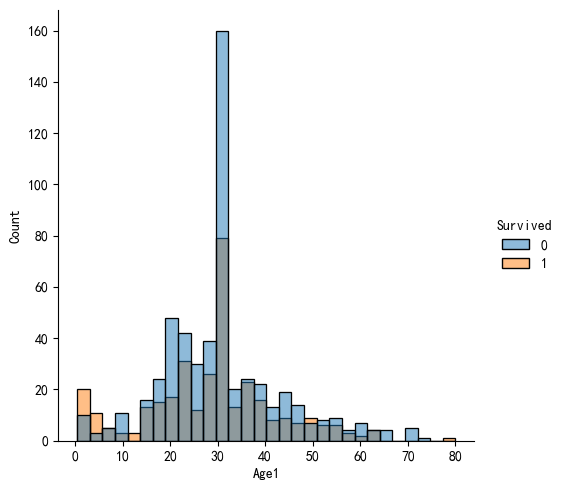

In [74]:
# 通过直方图观察年龄
sns.displot(
    x = 'Age1',
    hue = 'Survived',
    data = titanic_df
)

<Axes: xlabel='Survived', ylabel='Age'>

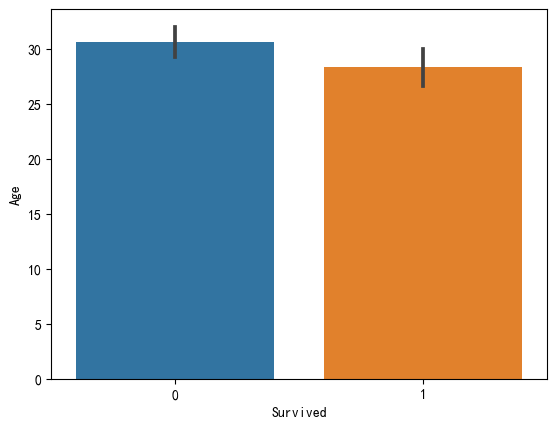

In [75]:
sns.barplot(
    y = 'Age',
    x = 'Survived',
    data = titanic_df
)

<Axes: xlabel='Survived', ylabel='Age1'>

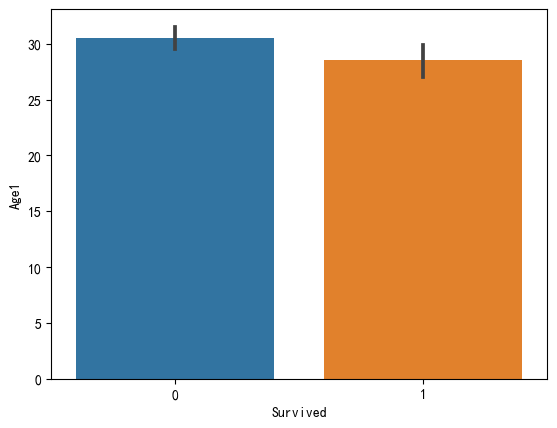

In [76]:
sns.barplot(
    y = 'Age1',
    x = 'Survived',
    data = titanic_df
)

思考题：如何针对缺失值进行某一范围内的随机值填充

### 4.2 分类变量的重新编码
#### 4.2.1 独热编码

    针对类别型变量，我们必须重新编码，把它们转换为数值型变量，但是信息量还不会丢失。最常用的一种类别变量编码方式 哑变量(Dummy Variables）编码，这是统计界的称呼，机器学习界喜欢叫独热编码（one-hot encoding)

    独热编码就是把 1 个类别型变量转化为 N 个 0/1 标识变量。类别型变量有多少个类别值，转化后的0/1标识变量就有多少个。例如下图示例的“地区”变量是类别型变量，进行独热编码之后，每一个地区对应一个 0/1 标识变量，用户属于哪个地区，在对应地区的 0/1 标识变量上取值为 1，否则就为 0。一条记录只会在一个变量上取值为 1，其他变量上取值为 0，这就是独热这个词的含义。
    
    pd.get_dummies(
        data,                 # 进行独热编码的分类变量，通常是Series
        prefix=None,             # 独热编码结果的前缀 
        prefix_sep='_',           # 前缀和实际列名称之间的连接符号
        dummy_na: 'bool' = False,
        columns=None,
        sparse: 'bool' = False,
        drop_first: 'bool' = False,   # 是否删除第一列，设置为True可以得到和统计分析一致的n-1列的哑变量
        dtype: 'Dtype | None' = None,
    ) -> 'DataFrame'               # 返回拆分好的DataFrame

In [77]:
# 把 Pclass 进行独热编码,保存为新的数据对象,名字叫 Pclass_onehot,prefix 参数设置独热编码后的变量名前缀
Pclass_onehot = pd.get_dummies(titanic_df.Pclass,prefix='Pclass')
# 查看前 5 行 
Pclass_onehot.head()

,Pclass_1,Pclass_2,Pclass_3
0,False,False,True
1,True,False,False
2,False,False,True
3,True,False,False
4,False,False,True


In [78]:
Pclass_onehot.Pclass_1.value_counts()

Pclass_1
False    675
True     216
Name: count, dtype: int64

In [79]:
titanic_df.Pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [80]:
# 性别
Sex_onehot = pd.get_dummies(titanic_df.Sex, prefix = 'Sex')

In [81]:
Sex_onehot

,Sex_female,Sex_male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [82]:
# 针对Sex的手动转换
titanic_df['Sex_0'] = 0

In [83]:
# 筛选出女性的数据，将Sex_0的值赋予1
titanic_df['Sex_0'][titanic_df.Sex == 'female'] = 1

In [84]:
titanic_df.Sex_0.value_counts()

Sex_0
0    577
1    314
Name: count, dtype: int64

In [85]:
titanic_df.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

### 4.3 连续变量的分箱（连续变量离散化）：等宽、等深、自定义

In [86]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived_c,Pclass_c,Age_isna,Cabin_isna,Age1,Sex_0
0,0,3,male,22.0,1,0,7.2500,NaN,S,0,3,0,1,22.0,0
1,1,1,female,38.0,1,0,71.2833,C85,C,1,1,0,0,38.0,1
2,1,3,female,26.0,0,0,7.9250,NaN,S,1,3,0,1,26.0,1
3,1,1,female,35.0,1,0,53.1000,C123,S,1,1,0,0,35.0,1
4,0,3,male,35.0,0,0,8.0500,NaN,S,0,3,0,1,35.0,0


In [87]:
#对 Age 进行自定义分箱
cut_points = [0,18,25,40,60,100]
#定义分箱边界值
titanic_df["Age_bin"] = pd.cut(titanic_df.Age1, bins=cut_points)
#分箱后的新变量 Age_bin 继续保存在原始的数据对象 titanic_df 中
# 分箱后的频数分析
titanic_df["Age_bin"].value_counts().sort_index()

Age_bin
(0, 18]      139
(18, 25]     162
(25, 40]     440
(40, 60]     128
(60, 100]     22
Name: count, dtype: int64

In [88]:
# 等宽分箱，分箱数为 10
titanic_df["Age_wbin"] = pd.cut(titanic_df.Age1,10)
# 分箱后的频数分析
titanic_df["Age_wbin"].value_counts().sort_index()

Age_wbin
(0.34, 8.378]        54
(8.378, 16.336]      46
(16.336, 24.294]    177
(24.294, 32.252]    346
(32.252, 40.21]     118
(40.21, 48.168]      70
(48.168, 56.126]     45
(56.126, 64.084]     24
(64.084, 72.042]      9
(72.042, 80.0]        2
Name: count, dtype: int64

In [89]:
# 等深分箱，分箱数为 5
titanic_df["Age_dbin"] = pd.qcut(titanic_df.Age1,5)
# 分箱后的频数分析
titanic_df["Age_dbin"].value_counts()

Age_dbin
(28.0, 30.0]     224
(20.0, 28.0]     183
(0.419, 20.0]    179
(38.0, 80.0]     177
(30.0, 38.0]     128
Name: count, dtype: int64

In [90]:
titanic_df.Age1.value_counts()

Age1
30.00    202
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: count, Length: 88, dtype: int64

In [91]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Sex         891 non-null    object  
 3   Age         714 non-null    float64 
 4   SibSp       891 non-null    int64   
 5   Parch       891 non-null    int64   
 6   Fare        891 non-null    float64 
 7   Cabin       204 non-null    object  
 8   Embarked    889 non-null    object  
 9   Survived_c  891 non-null    object  
 10  Pclass_c    891 non-null    object  
 11  Age_isna    891 non-null    int64   
 12  Cabin_isna  891 non-null    int64   
 13  Age1        891 non-null    float64 
 14  Sex_0       891 non-null    int64   
 15  Age_bin     891 non-null    category
 16  Age_wbin    891 non-null    category
 17  Age_dbin    891 non-null    category
dtypes: category(3), float64(3), int64(7), object(5)
me

In [92]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived_c,Pclass_c,Age_isna,Cabin_isna,Age1,Sex_0,Age_bin,Age_wbin,Age_dbin
0,0,3,male,22.0,1,0,7.2500,NaN,S,0,3,0,1,22.0,0,"(18, 25]","(16.336, 24.294]","(20.0, 28.0]"
1,1,1,female,38.0,1,0,71.2833,C85,C,1,1,0,0,38.0,1,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]"
2,1,3,female,26.0,0,0,7.9250,NaN,S,1,3,0,1,26.0,1,"(25, 40]","(24.294, 32.252]","(20.0, 28.0]"
3,1,1,female,35.0,1,0,53.1000,C123,S,1,1,0,0,35.0,1,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]"
4,0,3,male,35.0,0,0,8.0500,NaN,S,0,3,0,1,35.0,0,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]"


In [93]:
# 分箱后得到的变量就变成了类别型变量（这正是我们要分箱的目的），
# 那么就可以用前面学到的独热编码的方法对分箱后的变量进行编码了。
Age_bin_onehot = pd.get_dummies(titanic_df.Age_bin,prefix='Age_bin')
Age_bin_onehot.head()

,"Age_bin_(0, 18]","Age_bin_(18, 25]","Age_bin_(25, 40]","Age_bin_(40, 60]","Age_bin_(60, 100]"
0,False,True,False,False,False
1,False,False,True,False,False
2,False,False,True,False,False
3,False,False,True,False,False
4,False,False,True,False,False


### 4.4 连续变量的标准化处理（针对列进行处理）
#### 4.4.1 归一化 ： 将数据压缩到[0,1]区间，消除量纲的影响，方便对比和计算
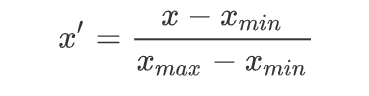

In [94]:
from sklearn.preprocessing import MinMaxScaler
# 创建4行2列测试数据
data = [[-1, 2], 
        [-0.5, 6],
        [0, 10], 
        [1, 18]]
# 利用构造函数实例化MinMaxScaler
scaler = MinMaxScaler()
# fit学习参数
scaler.fit(data)
# 训练算法，得到合适的模型
print("*********输出每一列的最大值，最小值**********")
print(scaler.data_max_)
print(scaler.data_min_)
print("*********归一化后的结果**********")
print(scaler.transform(data))
# 使用训练好的归一化算法模型对数据进行转换，得到归一化之后的结果

*********输出每一列的最大值，最小值**********
[ 1. 18.]
[-1.  2.]
*********归一化后的结果**********
[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]


In [95]:
from sklearn import preprocessing
# 实例化一个归一化转换器
minmaxscaler = preprocessing.MinMaxScaler()
# 使用 Age 变量的数据训练一个归一化转换模型
minmaxscaler.fit(titanic_df[['Age1']])
# Age 归一化处理后保存为原数据对象中的新变量 Age_normal
titanic_df['Age_normal'] = minmaxscaler.transform(titanic_df[['Age1']])
# 查看归一化后的数据 
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived_c,Pclass_c,Age_isna,Cabin_isna,Age1,Sex_0,Age_bin,Age_wbin,Age_dbin,Age_normal
0,0,3,male,22.0,1,0,7.2500,NaN,S,0,3,0,1,22.0,0,"(18, 25]","(16.336, 24.294]","(20.0, 28.0]",0.271174
1,1,1,female,38.0,1,0,71.2833,C85,C,1,1,0,0,38.0,1,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]",0.472229
2,1,3,female,26.0,0,0,7.9250,NaN,S,1,3,0,1,26.0,1,"(25, 40]","(24.294, 32.252]","(20.0, 28.0]",0.321438
3,1,1,female,35.0,1,0,53.1000,C123,S,1,1,0,0,35.0,1,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]",0.434531
4,0,3,male,35.0,0,0,8.0500,NaN,S,0,3,0,1,35.0,0,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]",0.434531


In [96]:
titanic_df.Age_normal.describe()

count    891.000000
mean       0.368672
std        0.163390
min        0.000000
25%        0.271174
50%        0.371701
75%        0.434531
max        1.000000
Name: Age_normal, dtype: float64

#### 4.4.2 z标准化 ：将数据转换为均值为0，标准差为1的形态，方便和标准正态分布进行对比
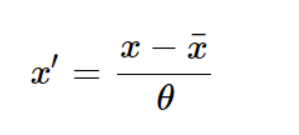

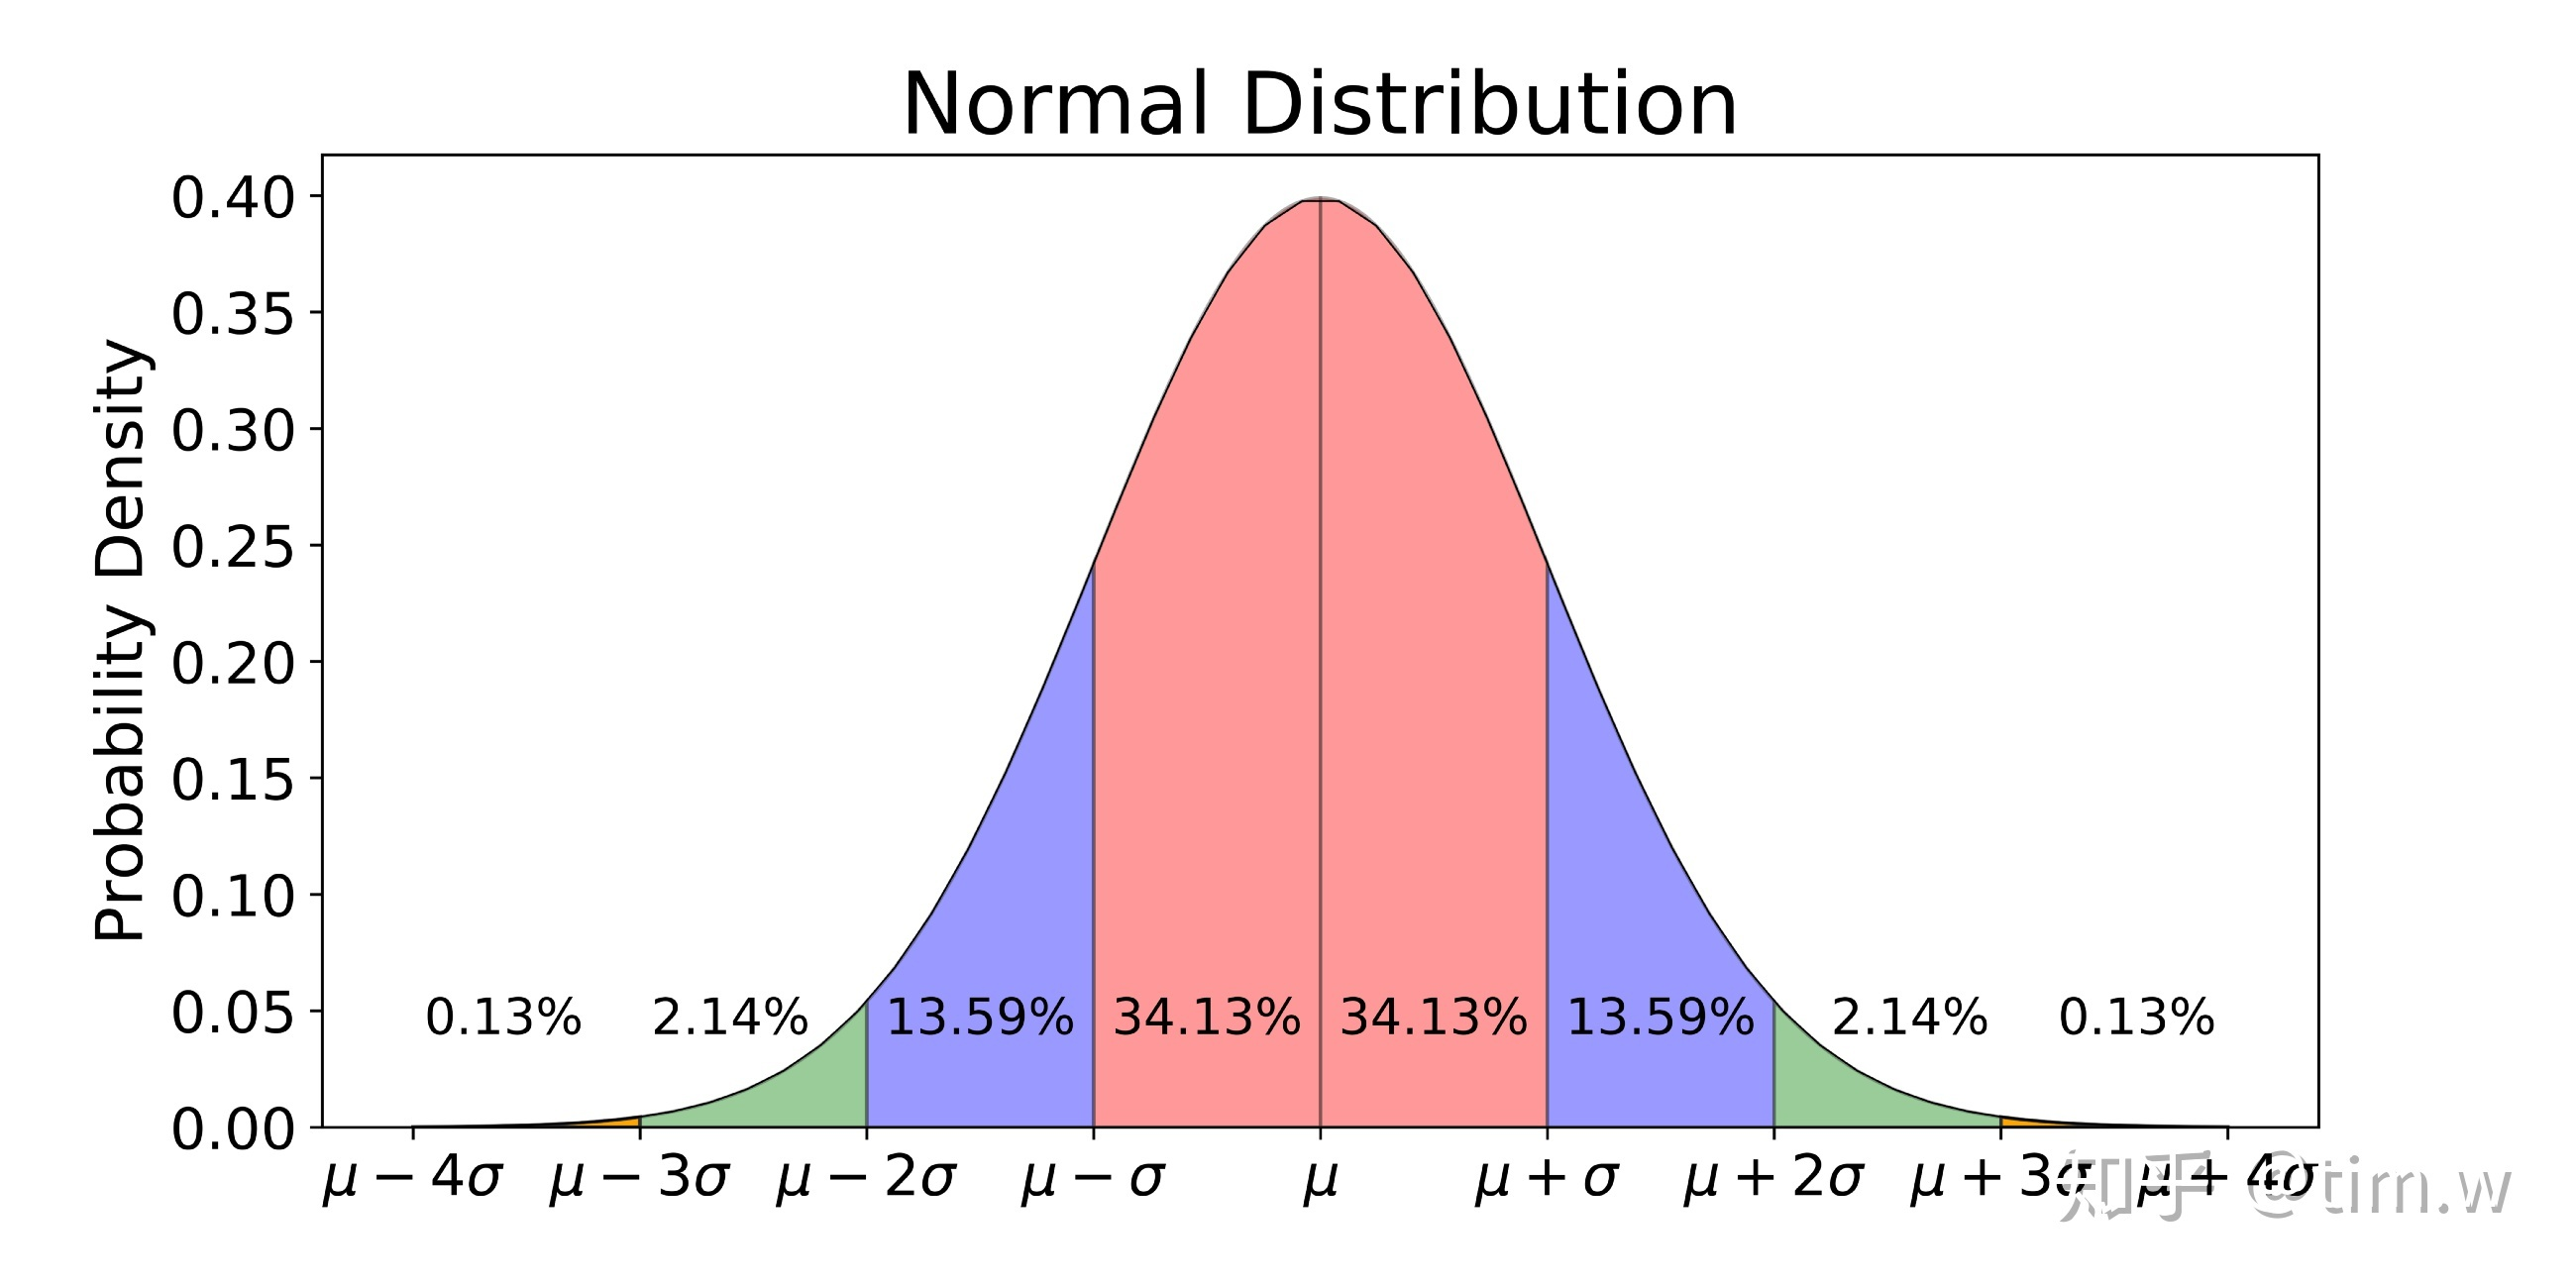

In [97]:
from sklearn import preprocessing
# 使用 Age 变量的数据训练一个标准化转换模型# 特别说明一下：需要使用 titanic_df[['Age']]
# 这样的方式来引用 Age 变量，这样得到的结果是 dataframe
# Age 标准化处理后保存为原数据对象中的新变量 Age_std
titanic_df['Age_std'] = preprocessing.scale(titanic_df[['Age1']])
# 查看标准化后的数据 
titanic_df['Age_std'].head()

0   -0.597055
1    0.634162
2   -0.289251
3    0.403309
4    0.403309
Name: Age_std, dtype: float64

In [98]:
titanic_df.Age_std.describe()
# 该操作并未将数据转换为标准正态分布

count    8.910000e+02
mean     1.594933e-16
std      1.000562e+00
min     -2.257659e+00
25%     -5.970548e-01
50%      1.855376e-02
75%      4.033091e-01
max      3.866107e+00
Name: Age_std, dtype: float64

<Axes: >

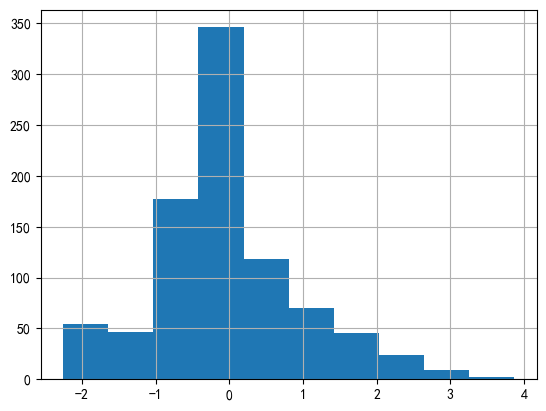

In [99]:
titanic_df.Age_std.hist()

<Axes: >

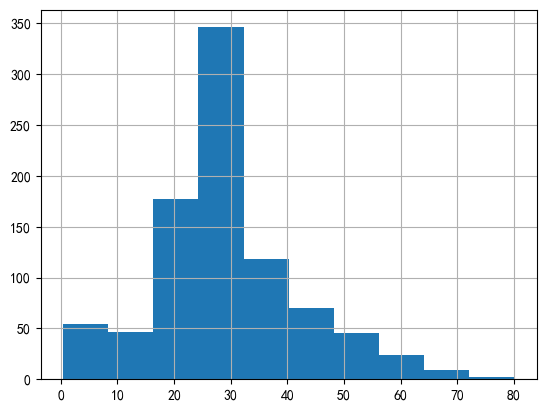

In [100]:
titanic_df.Age1.hist()

In [101]:
from sklearn import preprocessing
# 实例化一个标准化转换器
stdscaler = preprocessing.StandardScaler()
# 使用Age变量的数据训练一个标准化转换模型
# 特别说明一下：需要使用titanic_df[['Age']]这样的方式来引用Age变量，这样得到的结果是dataframe，不是series
stdscaler.fit(titanic_df[['Age1']])
# Age标准化处理后保存为原数据对象中的新变量Age_std
titanic_df['Age_std1'] = stdscaler.transform(titanic_df[['Age1']])
# 查看标准化后的数据
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived_c,...,Age_isna,Cabin_isna,Age1,Sex_0,Age_bin,Age_wbin,Age_dbin,Age_normal,Age_std,Age_std1
0,0,3,male,22.0,1,0,7.2500,NaN,S,0,...,0,1,22.0,0,"(18, 25]","(16.336, 24.294]","(20.0, 28.0]",0.271174,-0.597055,-0.597055
1,1,1,female,38.0,1,0,71.2833,C85,C,1,...,0,0,38.0,1,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]",0.472229,0.634162,0.634162
2,1,3,female,26.0,0,0,7.9250,NaN,S,1,...,0,1,26.0,1,"(25, 40]","(24.294, 32.252]","(20.0, 28.0]",0.321438,-0.289251,-0.289251
3,1,1,female,35.0,1,0,53.1000,C123,S,1,...,0,0,35.0,1,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]",0.434531,0.403309,0.403309
4,0,3,male,35.0,0,0,8.0500,NaN,S,0,...,0,1,35.0,0,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]",0.434531,0.403309,0.403309


In [102]:
titanic_df.Age_std1.describe()

count    8.910000e+02
mean     1.594933e-16
std      1.000562e+00
min     -2.257659e+00
25%     -5.970548e-01
50%      1.855376e-02
75%      4.033091e-01
max      3.866107e+00
Name: Age_std1, dtype: float64

<Axes: >

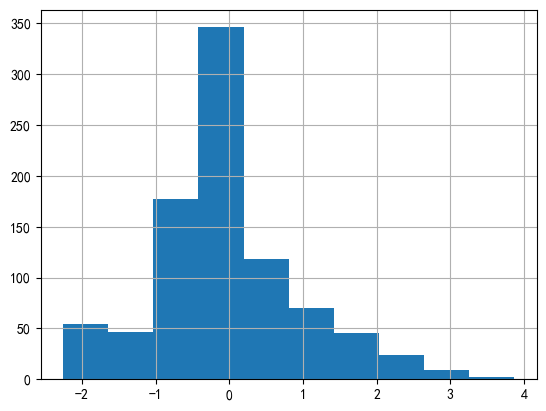

In [103]:
titanic_df.Age_std1.hist()

## 5.特征变量的构造与组合

    一般来说，有几种常用的新变量构造方法:

    多个变量之间的数学运算，例如构造一个新变量 z=a/b
    基于逻辑判断来构造衍生变量，形如 SQL 中的 case when ... then ...这样的方式
    多个特征变量进行组合，例如性别，年龄本来是两个独立的变量，可以把他们组合起来变成新的独热编码变量：男&(0,18]，男&(18,25]...
    变量构造非常重要，对应用机器学习来说，最重要的工作往往不是选择哪个算法，而是你能否构造出对目标变量有强预测能力的变量，这个工作又被称为特征工程，前面介绍的数据预处理的各种方法，也属于特征工程的范畴

#### 5.1 基于多个变量的运算构建

In [104]:
# 构造 FamilySize 变量
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
titanic_df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived_c,...,Cabin_isna,Age1,Sex_0,Age_bin,Age_wbin,Age_dbin,Age_normal,Age_std,Age_std1,FamilySize
0,0,3,male,22.0,1,0,7.2500,NaN,S,0,...,1,22.0,0,"(18, 25]","(16.336, 24.294]","(20.0, 28.0]",0.271174,-0.597055,-0.597055,2
1,1,1,female,38.0,1,0,71.2833,C85,C,1,...,0,38.0,1,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]",0.472229,0.634162,0.634162,2
2,1,3,female,26.0,0,0,7.9250,NaN,S,1,...,1,26.0,1,"(25, 40]","(24.294, 32.252]","(20.0, 28.0]",0.321438,-0.289251,-0.289251,1
3,1,1,female,35.0,1,0,53.1000,C123,S,1,...,0,35.0,1,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]",0.434531,0.403309,0.403309,2
4,0,3,male,35.0,0,0,8.0500,NaN,S,0,...,1,35.0,0,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]",0.434531,0.403309,0.403309,1


In [105]:
# FamilySize 与 Survived 的交叉表，显示频数
pd.crosstab(titanic_df.Survived,titanic_df.FamilySize)

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


In [106]:
pd.crosstab(titanic_df.Survived,titanic_df.FamilySize,normalize='columns')

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,0.696462,0.447205,0.421569,0.275862,0.8,0.863636,0.666667,1.0,1.0
1,0.303538,0.552795,0.578431,0.724138,0.2,0.136364,0.333333,0.0,0.0


### 5.2 基于逻辑判断构造新变量

In [107]:
# 构造一个新变量 IsAlone（是否独自一人)
titanic_df['IsAlone'] = 0
titanic_df.loc[titanic_df['FamilySize'] == 1, 'IsAlone'] = 1
# 频数统计
titanic_df['IsAlone'].value_counts()

IsAlone
1    537
0    354
Name: count, dtype: int64

In [108]:
pd.crosstab(titanic_df.Survived,titanic_df.IsAlone)

IsAlone,0,1
Survived,,
0,175,374
1,179,163


In [109]:
pd.crosstab(titanic_df.Survived,titanic_df.IsAlone,normalize='columns')

IsAlone,0,1
Survived,,
0,0.49435,0.696462
1,0.50565,0.303538


In [110]:
# 构造一个新变量 IsMother（是否是母亲）
titanic_df['IsMother'] = 0
titanic_df.loc[(titanic_df['Sex']=='female') & (titanic_df['Parch']>0) & (titanic_df['Age1']>20),'IsMother'] = 1
# 频数统计
titanic_df['IsMother'].value_counts()

IsMother
0    816
1     75
Name: count, dtype: int64

In [111]:
pd.crosstab(titanic_df.Survived,titanic_df.IsMother,normalize='columns')

IsMother,0,1
Survived,,
0,0.642157,0.333333
1,0.357843,0.666667


### 5.3 多个特征变量进行组合

In [112]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Sex         891 non-null    object  
 3   Age         714 non-null    float64 
 4   SibSp       891 non-null    int64   
 5   Parch       891 non-null    int64   
 6   Fare        891 non-null    float64 
 7   Cabin       204 non-null    object  
 8   Embarked    889 non-null    object  
 9   Survived_c  891 non-null    object  
 10  Pclass_c    891 non-null    object  
 11  Age_isna    891 non-null    int64   
 12  Cabin_isna  891 non-null    int64   
 13  Age1        891 non-null    float64 
 14  Sex_0       891 non-null    int64   
 15  Age_bin     891 non-null    category
 16  Age_wbin    891 non-null    category
 17  Age_dbin    891 non-null    category
 18  Age_normal  891 non-null    float64 
 19  Age_std 

In [113]:
# 把 Sex 性别和 Age_bin 特征进行组合
titanic_df['Sex_Age_combo'] = titanic_df['Sex'] + "_" + titanic_df['Age_bin'].astype(str)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived_c,...,Age_bin,Age_wbin,Age_dbin,Age_normal,Age_std,Age_std1,FamilySize,IsAlone,IsMother,Sex_Age_combo
0,0,3,male,22.0,1,0,7.2500,NaN,S,0,...,"(18, 25]","(16.336, 24.294]","(20.0, 28.0]",0.271174,-0.597055,-0.597055,2,0,0,"male_(18, 25]"
1,1,1,female,38.0,1,0,71.2833,C85,C,1,...,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]",0.472229,0.634162,0.634162,2,0,0,"female_(25, 40]"
2,1,3,female,26.0,0,0,7.9250,NaN,S,1,...,"(25, 40]","(24.294, 32.252]","(20.0, 28.0]",0.321438,-0.289251,-0.289251,1,1,0,"female_(25, 40]"
3,1,1,female,35.0,1,0,53.1000,C123,S,1,...,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]",0.434531,0.403309,0.403309,2,0,0,"female_(25, 40]"
4,0,3,male,35.0,0,0,8.0500,NaN,S,0,...,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]",0.434531,0.403309,0.403309,1,1,0,"male_(25, 40]"


In [114]:
titanic_df.Sex_Age_combo.value_counts()

Sex_Age_combo
male_(25, 40]       296
female_(25, 40]     144
male_(18, 25]       108
male_(40, 60]        83
male_(0, 18]         71
female_(0, 18]       68
female_(18, 25]      54
female_(40, 60]      45
male_(60, 100]       19
female_(60, 100]      3
Name: count, dtype: int64

In [115]:
pd.crosstab(titanic_df.Survived,titanic_df.Sex_Age_combo,normalize='columns')

Sex_Age_combo,"female_(0, 18]","female_(18, 25]","female_(25, 40]","female_(40, 60]","female_(60, 100]","male_(0, 18]","male_(18, 25]","male_(25, 40]","male_(40, 60]","male_(60, 100]"
Survived,,,,,,,,,,
0,0.323529,0.240741,0.243056,0.244444,0.0,0.661972,0.87963,0.817568,0.807229,0.894737
1,0.676471,0.759259,0.756944,0.755556,1.0,0.338028,0.12037,0.182432,0.192771,0.105263


In [116]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Survived       891 non-null    int64   
 1   Pclass         891 non-null    int64   
 2   Sex            891 non-null    object  
 3   Age            714 non-null    float64 
 4   SibSp          891 non-null    int64   
 5   Parch          891 non-null    int64   
 6   Fare           891 non-null    float64 
 7   Cabin          204 non-null    object  
 8   Embarked       889 non-null    object  
 9   Survived_c     891 non-null    object  
 10  Pclass_c       891 non-null    object  
 11  Age_isna       891 non-null    int64   
 12  Cabin_isna     891 non-null    int64   
 13  Age1           891 non-null    float64 
 14  Sex_0          891 non-null    int64   
 15  Age_bin        891 non-null    category
 16  Age_wbin       891 non-null    category
 17  Age_dbin       891 non-null    cate

In [117]:
# 对 Sex_Age_combo 进行独热编码
Sex_Age_combo_onehot = pd.get_dummies(titanic_df['Sex_Age_combo'], prefix='Sex_Age')
Sex_Age_combo_onehot.head()

,"Sex_Age_female_(0, 18]","Sex_Age_female_(18, 25]","Sex_Age_female_(25, 40]","Sex_Age_female_(40, 60]","Sex_Age_female_(60, 100]","Sex_Age_male_(0, 18]","Sex_Age_male_(18, 25]","Sex_Age_male_(25, 40]","Sex_Age_male_(40, 60]","Sex_Age_male_(60, 100]"
0,False,False,False,False,False,False,True,False,False,False
1,False,False,True,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False


In [118]:
# 把 Sex 性别和 Pclass 特征进行组合
titanic_df['Sex_Pclass_combo'] = titanic_df['Sex'] + "_" + titanic_df['Pclass'].astype(str)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived_c,...,Age_wbin,Age_dbin,Age_normal,Age_std,Age_std1,FamilySize,IsAlone,IsMother,Sex_Age_combo,Sex_Pclass_combo
0,0,3,male,22.0,1,0,7.2500,NaN,S,0,...,"(16.336, 24.294]","(20.0, 28.0]",0.271174,-0.597055,-0.597055,2,0,0,"male_(18, 25]",male_3
1,1,1,female,38.0,1,0,71.2833,C85,C,1,...,"(32.252, 40.21]","(30.0, 38.0]",0.472229,0.634162,0.634162,2,0,0,"female_(25, 40]",female_1
2,1,3,female,26.0,0,0,7.9250,NaN,S,1,...,"(24.294, 32.252]","(20.0, 28.0]",0.321438,-0.289251,-0.289251,1,1,0,"female_(25, 40]",female_3
3,1,1,female,35.0,1,0,53.1000,C123,S,1,...,"(32.252, 40.21]","(30.0, 38.0]",0.434531,0.403309,0.403309,2,0,0,"female_(25, 40]",female_1
4,0,3,male,35.0,0,0,8.0500,NaN,S,0,...,"(32.252, 40.21]","(30.0, 38.0]",0.434531,0.403309,0.403309,1,1,0,"male_(25, 40]",male_3


In [119]:
titanic_df.Sex_Pclass_combo.value_counts()

Sex_Pclass_combo
male_3      347
female_3    144
male_1      122
male_2      108
female_1     94
female_2     76
Name: count, dtype: int64

In [120]:
pd.crosstab(titanic_df.Survived,titanic_df.Sex_Pclass_combo,normalize='columns')

Sex_Pclass_combo,female_1,female_2,female_3,male_1,male_2,male_3
Survived,,,,,,
0,0.031915,0.078947,0.5,0.631148,0.842593,0.864553
1,0.968085,0.921053,0.5,0.368852,0.157407,0.135447


数据预处理和特征工程的整体代码

In [121]:
# 导入相关包
import pandas as pd
# 读取数据
titanic_df = pd.read_csv('data/train.csv')
# drop 掉 PassengerId,Name,Ticket,Cabin
titanic_df = titanic_df.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1)
# 构造一个新变量 AgeIsMissing
titanic_df['AgeIsMissing'] = 0
titanic_df.loc[titanic_df['Age'].isnull(), 'AgeIsMissing'] = 1
# 对 Age 缺失值进行均值填充
age_mean = round(titanic_df['Age'].mean())
titanic_df['Age'].fillna(age_mean, inplace=True)
# 对 Embarked 缺失值用'S'替换
titanic_df['Embarked'].fillna('S', inplace=True)
# 对 Age 进行分箱--自定义分箱
cut_points = [0,18,25,40,60,100]
titanic_df["AgeBin"] = pd.cut(titanic_df.Age, bins=cut_points)
# 对 Fare 船票价格进行分箱--等深分箱
titanic_df["FareBin"] = pd.qcut(titanic_df.Fare, 5)
# 构造 FamilySize 变量
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
# 构造一个新变量 IsAlone（是否独自一人)
titanic_df['IsAlone'] = 0
titanic_df.loc[titanic_df['FamilySize'] == 1, 'IsAlone'] = 1
# 构造一个新变量 IsMother（是否是母亲）
titanic_df['IsMother'] = 0
titanic_df.loc[(titanic_df['Sex']=='female') & (titanic_df['Parch']>0) & (titanic_df['Age']>20),
'IsMother'] = 1
# 把 Sex 性别和 AgeBin 特征进行组合
titanic_df['SexAgeCombo'] = titanic_df['Sex'] + "_" + titanic_df['AgeBin'].astype(str)
# 对 Pclass,Sex,Embarked,AgeBin,FareBin,FamilySize,Sex_Age_combo 进行独热编码
Pclass = pd.get_dummies(titanic_df.Pclass,prefix='Pclass')
Sex = pd.get_dummies(titanic_df.Sex,prefix='Sex')
Embarked = pd.get_dummies(titanic_df.Embarked,prefix='Embarked')
AgeBin = pd.get_dummies(titanic_df.AgeBin,prefix='AgeBin')
FareBin = pd.get_dummies(titanic_df.FareBin,prefix='FareBin')
FamilySize = pd.get_dummies(titanic_df.FamilySize,prefix='FamilySize')
SexAgeCombo = pd.get_dummies(titanic_df.SexAgeCombo,prefix='SexAgeCombo')
# 把需要的变量全部拼接在一起 
TrainData =pd.concat([titanic_df[['Survived','AgeIsMissing','IsAlone','IsMother']],
Pclass,Sex,Embarked,AgeBin,FareBin,FamilySize,SexAgeCombo],axis=1)
# 描述性统计
TrainData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
AgeIsMissing,891.0,0.198653,0.399210,0.0,0.0,0.0,0.0,1.0
IsAlone,891.0,0.602694,0.489615,0.0,0.0,1.0,1.0,1.0
IsMother,891.0,0.084175,0.277806,0.0,0.0,0.0,0.0,1.0


In [122]:
TrainData.head()

,Survived,AgeIsMissing,IsAlone,IsMother,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,...,"SexAgeCombo_female_(0, 18]","SexAgeCombo_female_(18, 25]","SexAgeCombo_female_(25, 40]","SexAgeCombo_female_(40, 60]","SexAgeCombo_female_(60, 100]","SexAgeCombo_male_(0, 18]","SexAgeCombo_male_(18, 25]","SexAgeCombo_male_(25, 40]","SexAgeCombo_male_(40, 60]","SexAgeCombo_male_(60, 100]"
0,0,0,0,0,False,False,True,False,True,False,...,False,False,False,False,False,False,True,False,False,False
1,1,0,0,0,True,False,False,True,False,True,...,False,False,True,False,False,False,False,False,False,False
2,1,0,1,0,False,False,True,True,False,False,...,False,False,True,False,False,False,False,False,False,False
3,1,0,0,0,True,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
4,0,0,1,0,False,False,True,False,True,False,...,False,False,False,False,False,False,False,True,False,False


In [123]:
TrainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Survived                      891 non-null    int64
 1   AgeIsMissing                  891 non-null    int64
 2   IsAlone                       891 non-null    int64
 3   IsMother                      891 non-null    int64
 4   Pclass_1                      891 non-null    bool 
 5   Pclass_2                      891 non-null    bool 
 6   Pclass_3                      891 non-null    bool 
 7   Sex_female                    891 non-null    bool 
 8   Sex_male                      891 non-null    bool 
 9   Embarked_C                    891 non-null    bool 
 10  Embarked_Q                    891 non-null    bool 
 11  Embarked_S                    891 non-null    bool 
 12  AgeBin_(0, 18]                891 non-null    bool 
 13  AgeBin_(18, 25]               891 n

In [124]:
TrainData.to_csv('data/end_data.csv')